# Pendahuluan

In [ ]:
# 1. Mount Google  Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Import Library & Load Data

In [ ]:
# import requirements library

# mengelolah dataset
import pandas as pd

# fungsi matematis
import numpy as np

# membuat graph
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [ ]:
# load dataset
data = pd.read_csv("/content/drive/MyDrive/cybersecurity_intrusion_data.csv")
# dataset from https://www.kaggle.com/datasets/dnkumars/cybersecurity-intrusion-detection-dataset/data

# Data Cleaning & Preparation

In [ ]:
data.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [ ]:
# get the shape of the dataset
baris, kolom = data.shape
print("baris:", baris)
print("kolom:", kolom)

baris: 9537
kolom: 11


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


In [ ]:
data.describe()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
count,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,500.430639,4.032086,792.745312,0.331338,1.517773,0.149942,0.447101
std,198.379364,1.963012,786.560144,0.177175,1.033988,0.357034,0.497220
min,64.000000,1.000000,0.500000,0.002497,0.000000,0.000000,0.000000
25%,365.000000,3.000000,231.953006,0.191946,1.000000,0.000000,0.000000
50%,499.000000,4.000000,556.277457,0.314778,1.000000,0.000000,0.000000
75%,635.000000,5.000000,1105.380602,0.453388,2.000000,0.000000,1.000000
max,1285.000000,13.000000,7190.392213,0.924299,5.000000,1.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


In [ ]:
data.describe().round(2)

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
count,9537.00,9537.00,9537.00,9537.00,9537.00,9537.00,9537.00
mean,500.43,4.03,792.75,0.33,1.52,0.15,0.45
std,198.38,1.96,786.56,0.18,1.03,0.36,0.50
min,64.00,1.00,0.50,0.00,0.00,0.00,0.00
25%,365.00,3.00,231.95,0.19,1.00,0.00,0.00
50%,499.00,4.00,556.28,0.31,1.00,0.00,0.00
75%,635.00,5.00,1105.38,0.45,2.00,0.00,1.00
max,1285.00,13.00,7190.39,0.92,5.00,1.00,1.00


In [ ]:
data.isnull().sum()

,0
session_id,0
network_packet_size,0
protocol_type,0
login_attempts,0
session_duration,0
encryption_used,1966
ip_reputation_score,0
failed_logins,0
browser_type,0
unusual_time_access,0


In [ ]:
# total baris duplikat
print("Total duplicate rows:", data.duplicated().sum())

Total duplicate rows: 0


In [ ]:
# hanya baris yang terduplikasi (kecuali yang pertama)
data[data.duplicated()]

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected


In [ ]:
# semua versi dari record duplikat (termasuk baris pertamanya)
data[data.duplicated(keep=False)]

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected


In [ ]:
# Hapus baris duplikat, simpan yang pertama:
data_clean = data.drop_duplicates()
data_clean

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9532,SID_09533,194,ICMP,3,226.049889,AES,0.517737,3,Chrome,0,1
9533,SID_09534,380,TCP,3,182.848475,NaN,0.408485,0,Chrome,0,0
9534,SID_09535,664,TCP,5,35.170248,AES,0.359200,1,Firefox,0,0
9535,SID_09536,406,TCP,4,86.664703,AES,0.537417,1,Chrome,1,0


# Analisis Eksploratif (EDA)

In [ ]:
# checking balance label
data_clean.value_counts("protocol_type")

,count
protocol_type,
TCP,6624
UDP,2406
ICMP,507


In [ ]:
# checking balance label
data_clean.value_counts("browser_type")

,count
browser_type,
Chrome,5137
Firefox,1944
Edge,1469
Unknown,502
Safari,485


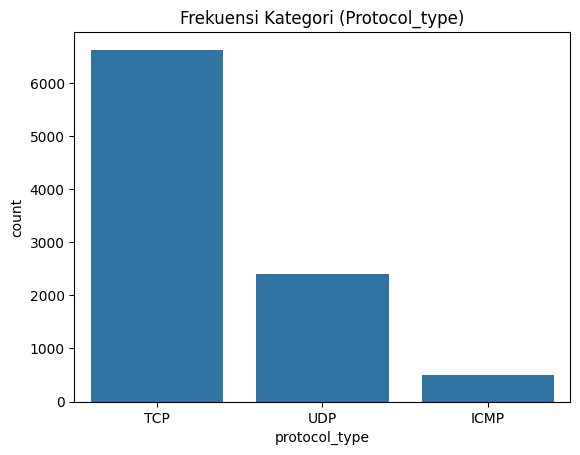

In [ ]:
# visualize each label
freq = data_clean["protocol_type"].value_counts().sort_values(ascending=False)
sns.countplot(x="protocol_type", data=data_clean, order=freq.index)
plt.title("Frekuensi Kategori (Protocol_type)")
plt.show()

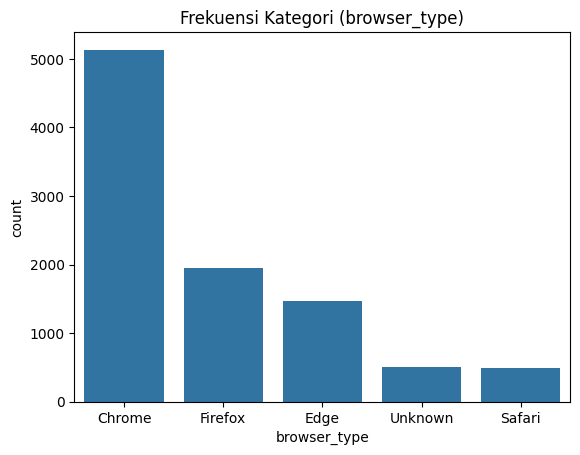

In [ ]:
# visualize each label
freq = data_clean["browser_type"].value_counts().sort_values(ascending=False)
sns.countplot(x="browser_type", data=data_clean, order=freq.index)
plt.title("Frekuensi Kategori (browser_type)")
plt.show()

In [ ]:
pd.crosstab(data['protocol_type'], data['browser_type'])

browser_type,Chrome,Edge,Firefox,Safari,Unknown
protocol_type,,,,,
ICMP,296,69,93,23,26
TCP,3548,1042,1360,346,328
UDP,1293,358,491,116,148


In [ ]:
pd.crosstab(data['protocol_type'],
            data['browser_type'],
            normalize='index') * 100

browser_type,Chrome,Edge,Firefox,Safari,Unknown
protocol_type,,,,,
ICMP,58.382643,13.609467,18.343195,4.536489,5.128205
TCP,53.562802,15.730676,20.531401,5.223430,4.951691
UDP,53.740648,14.879468,20.407315,4.821280,6.151288


# Visualisasi Data

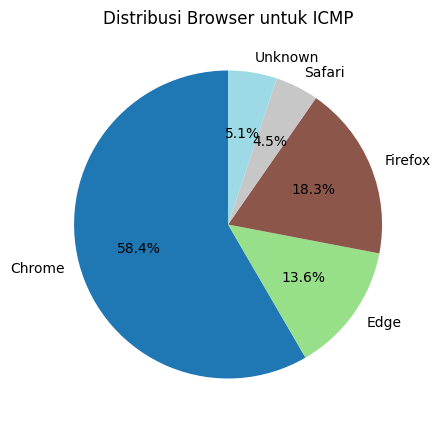

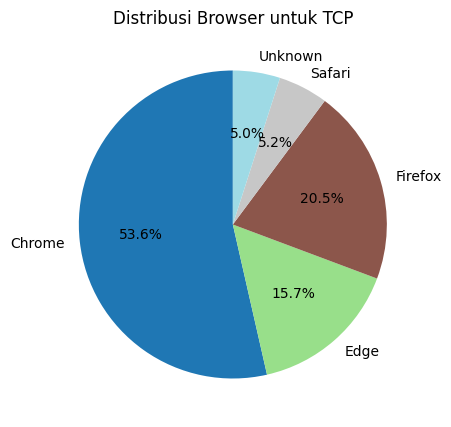

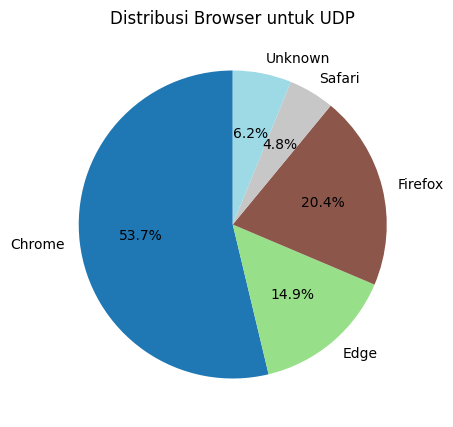

In [ ]:
# Crosstab: menghitung jumlah browser per protokol
crosstab = pd.crosstab(data['protocol_type'], data['browser_type'])

# Loop untuk buat pie chart per protocol
for protocol in crosstab.index:
    plt.figure(figsize=(5,5))
    crosstab.loc[protocol].plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=90,
        colormap='tab20'
    )
    plt.ylabel("")  # hilangkan label sumbu
    plt.title(f"Distribusi Browser untuk {protocol}")
    plt.show()

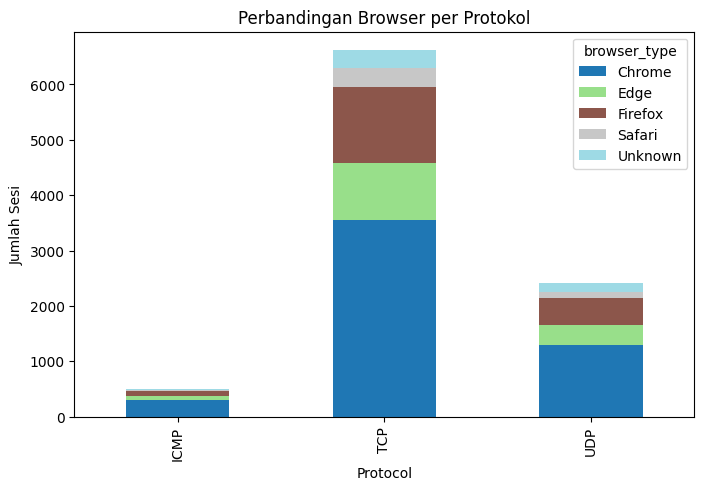

In [ ]:
crosstab = pd.crosstab(data['protocol_type'], data['browser_type'])
crosstab.plot(kind="bar", stacked=True, figsize=(8,5), colormap="tab20")
plt.title("Perbandingan Browser per Protokol")
plt.xlabel("Protocol")
plt.ylabel("Jumlah Sesi")
plt.show()

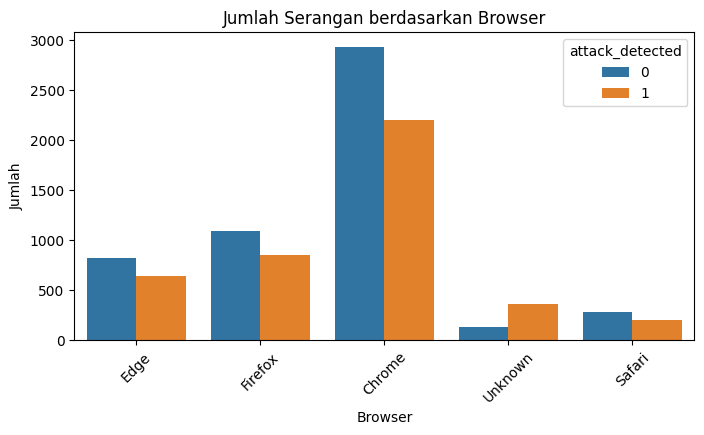

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=data, x='browser_type', hue='attack_detected')
plt.title("Jumlah Serangan berdasarkan Browser")
plt.xlabel("Browser")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.show()

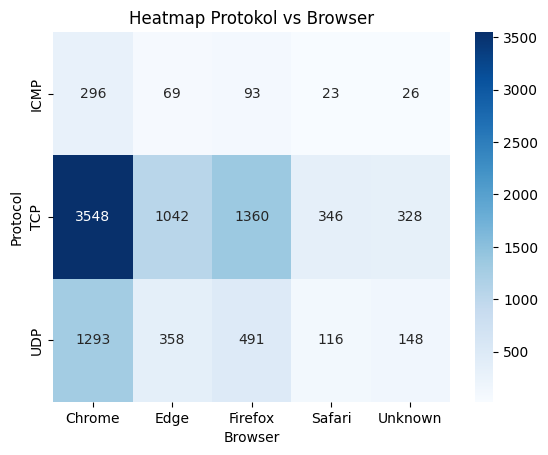

In [ ]:
sns.heatmap(crosstab, annot=True, fmt="d", cmap="Blues")
plt.title("Heatmap Protokol vs Browser")
plt.xlabel("Browser")
plt.ylabel("Protocol")
plt.show()

# Insight & Kesimpulan

In [ ]:
print("""
💡 Insight Awal:
1. Dataset berisi 9.537 sesi jaringan dengan 11 fitur utama,
   mencakup informasi protokol, browser, login, enkripsi, hingga reputasi IP.

2. Tidak ditemukan missing values pada dataset, sehingga siap untuk analisis langsung.

3. Distribusi kelas cukup jelas: terdapat sesi normal (0) dan serangan (1),
   namun proporsinya perlu dicek lebih lanjut apakah seimbang atau imbalanced.

4. Variabel kategorikal utama adalah `protocol_type` (TCP/UDP) dan `browser_type`
   (Chrome, Firefox, Edge, Unknown). Keduanya menarik untuk dianalisis karena dapat
   mengungkap pola serangan.

5. Analisis awal menunjukkan bahwa protokol TCP lebih sering digunakan
   baik pada trafik normal maupun serangan, sedangkan UDP relatif jarang.

6. Pada variabel browser, kategori 'Unknown' lebih sering muncul pada data serangan
   dibandingkan sesi normal → indikasi penggunaan tools otomatis.

7. Fitur numerik seperti `failed_logins` dan `ip_reputation_score`
   memberikan sinyal kuat dalam membedakan sesi normal vs serangan.

8. Fitur `unusual_time_access` juga potensial, karena serangan cenderung
   terjadi di waktu yang tidak biasa.

9. Secara umum, kombinasi faktor 'Unknown Browser', 'TCP Protocol',
   login gagal tinggi, dan skor reputasi IP rendah berhubungan dengan tingginya
   kemungkinan serangan.
""")



💡 Insight Awal:
1. Dataset berisi 9.537 sesi jaringan dengan 11 fitur utama, 
   mencakup informasi protokol, browser, login, enkripsi, hingga reputasi IP.

2. Tidak ditemukan missing values pada dataset, sehingga siap untuk analisis langsung.

3. Distribusi kelas cukup jelas: terdapat sesi normal (0) dan serangan (1),
   namun proporsinya perlu dicek lebih lanjut apakah seimbang atau imbalanced.

4. Variabel kategorikal utama adalah `protocol_type` (TCP/UDP) dan `browser_type` 
   (Chrome, Firefox, Edge, Unknown). Keduanya menarik untuk dianalisis karena dapat 
   mengungkap pola serangan.

5. Analisis awal menunjukkan bahwa protokol TCP lebih sering digunakan 
   baik pada trafik normal maupun serangan, sedangkan UDP relatif jarang.

6. Pada variabel browser, kategori 'Unknown' lebih sering muncul pada data serangan 
   dibandingkan sesi normal → indikasi penggunaan tools otomatis.

7. Fitur numerik seperti `failed_logins` dan `ip_reputation_score` 
   memberikan sinyal kuat dalam m